<a href="https://colab.research.google.com/github/lephuocdat2000/-CS114.K21-/blob/master/Round2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from matplotlib import pyplot 
from sklearn.model_selection import train_test_split
from sklearn import preprocessing 
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error
from yellowbrick.regressor import ResidualsPlot

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


Lấy data từ link về


In [3]:
!wget http://cs.uit.edu.vn/data2.txt
!ls

--2020-06-14 03:08:44--  http://cs.uit.edu.vn/data2.txt
Resolving cs.uit.edu.vn (cs.uit.edu.vn)... 118.69.123.142
Connecting to cs.uit.edu.vn (cs.uit.edu.vn)|118.69.123.142|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1203726 (1.1M) [text/plain]
Saving to: ‘data2.txt’

data2.txt           100%[===================>]   1.15M   877KB/s    in 1.3s    

2020-06-14 03:08:47 (877 KB/s) - ‘data2.txt’ saved [1203726/1203726]

data2.txt  sample_data


Đọc dữ liệu bằng pd.read_csv và tách bộ dữ liệu

In [0]:
data=pd.read_csv('data2.txt',header=None)
data.columns=['Complexity','Timing']
x=data[['Complexity']]
y=data[['Timing']]
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1,)

Lựa chọn model và fit bộ dữ liệu X_train.values và y_train.values

In [27]:
model=LinearRegression().fit(X_train.values,y_train.values)
print("Slope: ",model.coef_)
print("Intercept: ",model.intercept_)
y_fit=model.predict(X_train.values)

Slope:  [[8.4556115e-08]]
Intercept:  [-0.01591377]


Vẽ đồ thị để xem được mô hình có khớp với bộ dữ liệu test hay không

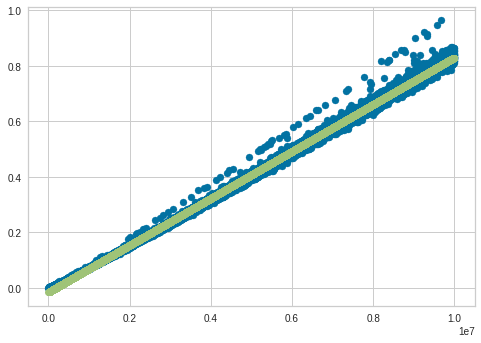

In [28]:
y_predict=model.predict(X_test.values)
plt.scatter(X_test.values,y_test.values)
plt.plot(X_test.values,y_predict,'go')

Ứng dụng dự đoán cho model

In [29]:
def Prediction(x,train=X_train,model=model):
  # squarex=np.power(x,2)
  #log2x=np.log2(x,where=(x!=0))*x
   arr=np.array([[x]])
   pred=model.predict(arr)
   print("Thoi gian du tinh cua thuat toan voi do phuc tap ",x," la: ",pred[0][0])
Prediction(4426776)

Thoi gian du tinh cua thuat toan voi do phuc tap  4426776  la:  0.3583972104583744


Khả năng dự đoán của ứng dụng ta có thể đánh giá việc dự đoán của model trên bộ test set

Tính toán R square: Tỉ lệ tương thích giữa giá trị các data point được dự đoán dựa trên model được xây dựng so với các data point thực tế 

In [30]:
r2_score(y_test,y_predict)

0.9975725646439417

Ở đây ta thấy dược R square xấp xỉ 1 => Các data point được dự đoán so với data point thực tế trên bộ test set gần như là giống nhau

Tiếp theo,đánh giá mean square error: Trung bình của tổng bình phương về sự khác nhau giữa các data point dự đoán và data point thực tế (để tính xem tổng khoảng cách giữa fitted line và data point thực tế ). Mean square error càng nhỏ thì mô hình các khớp với bộ dữ liệu.

In [33]:
# See our Squared Mean Error score and Root Mean Squared Error:
test_mse = mean_squared_error(y_test, y_predict,)
print("mean square error",test_mse) 

mean square error 0.00014442191299350495


Mean square error rất nhỏ và R square lớn(xấp xỉ bằng 1) => Ứng dụng dự đoán tốt 